### Part - A

DOMAIN: Automobile

• CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

• DATA DESCRIPTION:

• PROJECT OBJECTIVE: To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

### 1. Data Understanding & Exploration:

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.

B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.

C. Merge both the DataFrames together to form a single DataFrame

D. Print 5 point summary of the numerical features and share insights.

In [311]:
import pandas as pdpae
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [312]:
# Read Dataset 1
pd1 = pd.read_csv('Car_name.csv')

In [313]:
# Read Dataset 2
pd2 = pd.read_json('Car-attributes.json')

In [314]:
# Combine the two datasets
dataset = pd1.join(pd2)

In [315]:
# Print the Datasets
dataset

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


In [316]:
# Print 5 point Summary
dataset.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


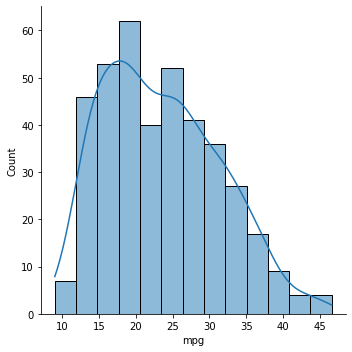

In [317]:
sns.displot(dataset['mpg'], kde=True)

<b>The MPG of the dataset seems to the right skewed with mean value of 23 MPG</b>

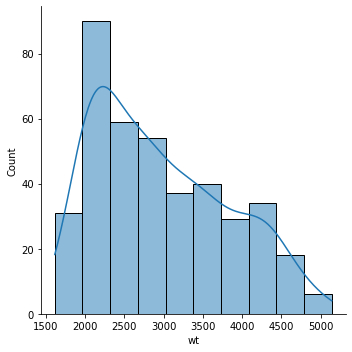

In [318]:
sns.displot(dataset['wt'], kde=True)

<b>The Weight of the dataset seems to the right skewed with most cars having mean wt af around 2 tonnes</b>

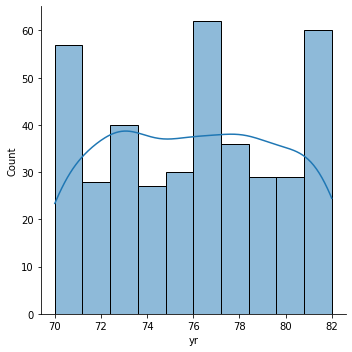

In [319]:
sns.displot(dataset['yr'], kde=True)

<b>The Model Year Distribution seems flat with most cars belonging to 1976 Model Yead</b>

### 2. Data Preparation & Analysis

#### 2.A Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [320]:
dataset.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [321]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [322]:
# it seems hp column has some invalid values
dataset['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

HP columns contains some invalid values, lets remove those values

In [323]:
dataset[dataset.hp == "?"]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [324]:
# % of rows with invalid values
((dataset[dataset.hp == "?"].shape[0])/(dataset.shape[0]))*100

1.507537688442211

There are 6 rows (1.5 %) with invalid values

In [325]:
# Lets remove these rows from dataset
dataset = dataset[dataset.hp != '?']

In [326]:
dataset.hp.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, 100, 105, 175, 153, 180, 110,
       72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145, 137,
       158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61, 93,
       148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68, 58,
       149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [327]:
dataset.shape

(392, 9)

In [328]:
# Now convert hp column into float

dataset['hp'] = dataset['hp'].astype('int64', errors='raise')

<ipython-input-328-8592ffaae2aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['hp'] = dataset['hp'].astype('int64', errors='raise')


In [329]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  392 non-null    object 
 1   mpg       392 non-null    float64
 2   cyl       392 non-null    int64  
 3   disp      392 non-null    float64
 4   hp        392 non-null    int64  
 5   wt        392 non-null    int64  
 6   acc       392 non-null    float64
 7   yr        392 non-null    int64  
 8   origin    392 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [330]:
dataset.hp.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

#### 2.B Check for duplicate values in the data and impute with the best suitable approach.

In [331]:
dataset.describe(include='all')

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
count,392,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
unique,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,toyota corolla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,NaN,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,NaN,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,NaN,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,NaN,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,NaN,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000


<b>The dataset doesn't contains any valid duplicates as name columns can have duplicates</b>

#### 2.C Plot a pairplot for all features

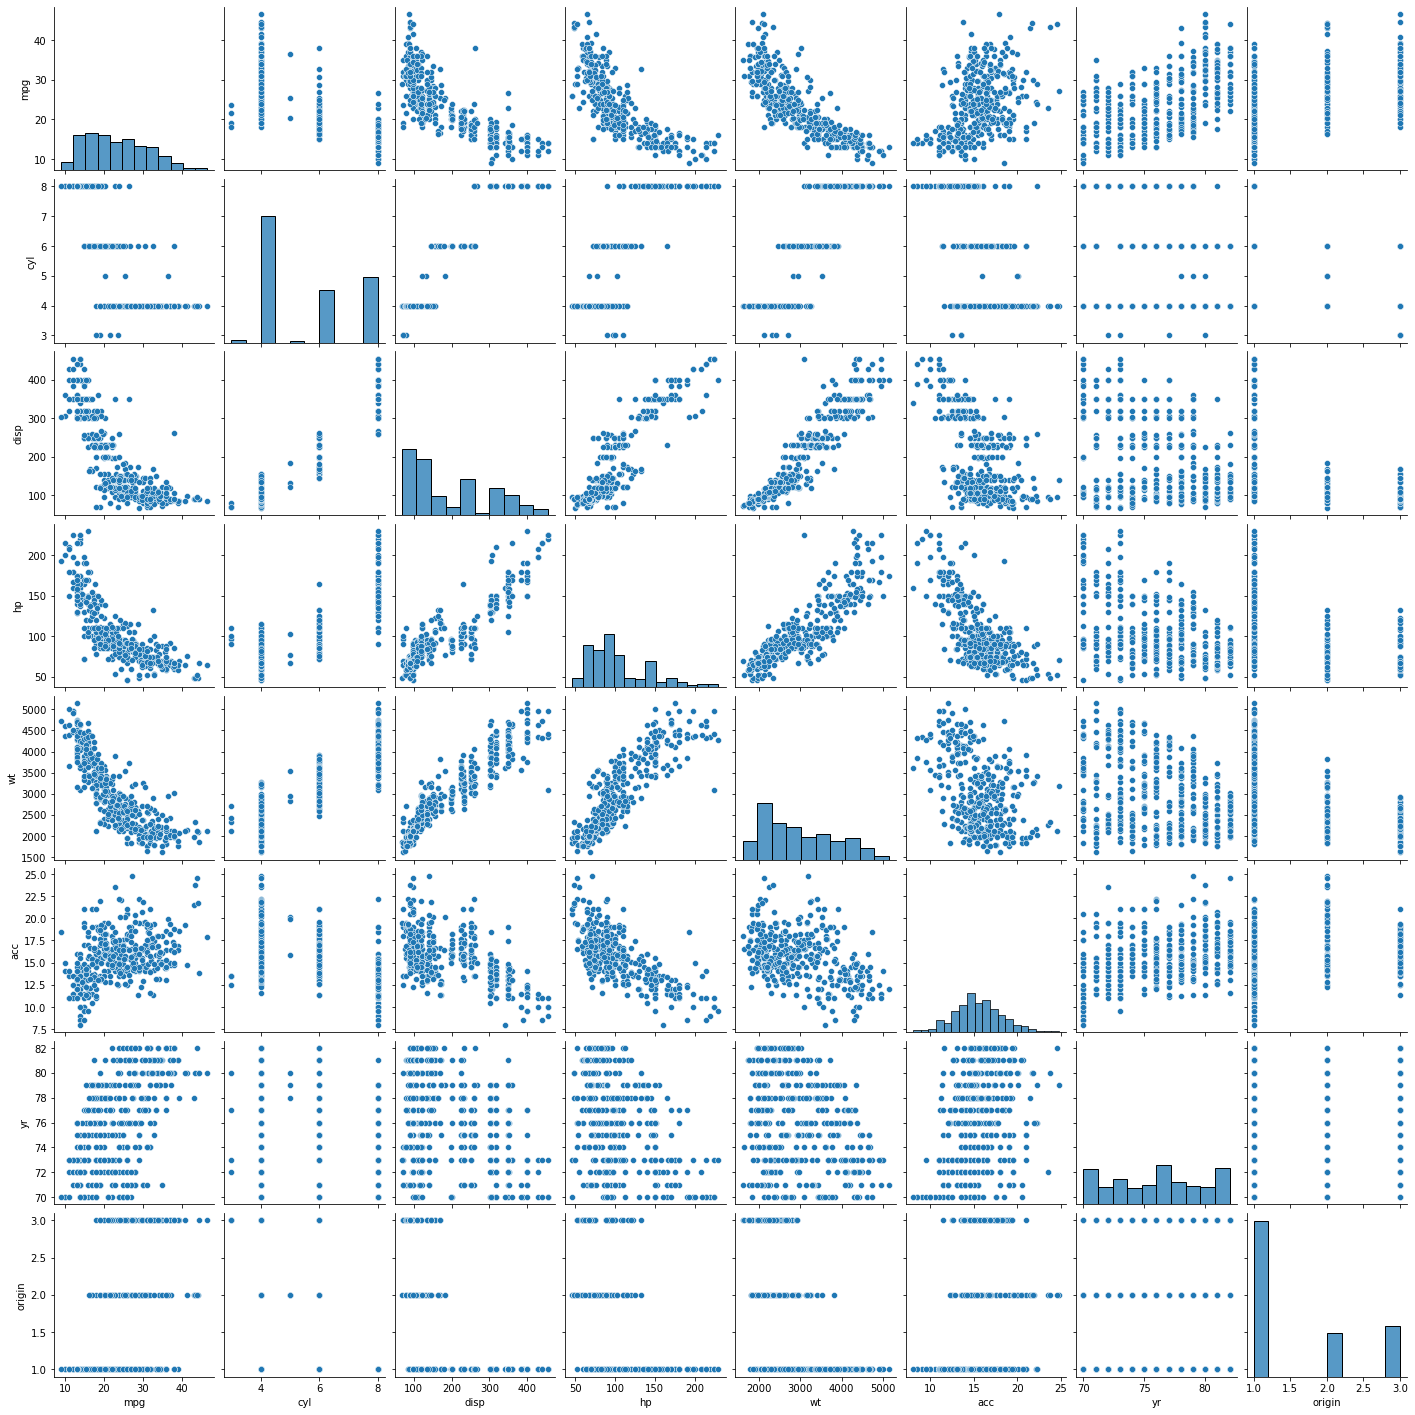

In [332]:
sns.pairplot(dataset)

#### 2.D Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

<AxesSubplot:xlabel='disp', ylabel='wt'>

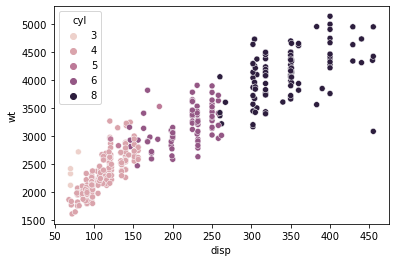

In [333]:
sns.scatterplot(data=dataset, x="disp", y="wt", hue="cyl")

#### 2.E Share Insights 

<b> It seems heavier car has bigger engine with more cylider count and higher displacement and vice versa </b>

#### 2.F Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. 

<AxesSubplot:xlabel='wt', ylabel='mpg'>

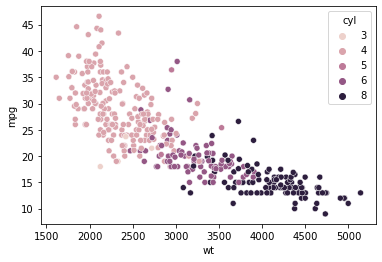

In [334]:
sns.scatterplot(data=dataset, x="wt", y="mpg", hue="cyl")

#### 2.G Share insights

<b>It seems lighter cars have higher mpg values with smaller engines sizes</b>

#### 2.H Check for unexpected values in all the features and datapoints with such values

<b> This has already been handled in Step 2.A </b>

### 3. Clustering

#### 3.A Apply K-Means clustering for 2 to 10 clusters. 

In [335]:
# Drop 'Car name' Column
dataset.drop('car_name', axis=1, inplace=True)

dataset = dataset.apply(zscore)

D:\official\softwares\anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### 2.B Visualize the Elbow point

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

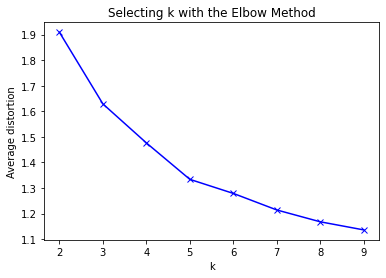

In [336]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataset)
    # prediction=model.predict(dataset)
    meanDistortions.append(sum(np.min(cdist(dataset, model.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


#### 2.C On the above visual, highlight which are the possible Elbow points

<b>The Elbow Point apprears to be a 5 Clusters</b>

#### 2.D Train a K-means clustering model once again on the optimal number of clusters

In [344]:
model=KMeans(n_clusters=5)
test_data = dataset.iloc[-1:]
train_data = dataset.iloc[:-1,:]
model.fit(dataset)
prediction = model.predict(train_data)


#### 2.E Add a new feature in the DataFrame which will have labels based upon cluster value.

In [338]:
#Append the prediction 
dataset["category"] = prediction
print("Groups Assigned : \n")
dataset.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,category
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641,4
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641,4
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641,4
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641,4
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641,4


In [339]:
dataset.category.unique()

array([4, 0, 1, 2, 3])

#### 2.F Plot a visual and color the datapoints based upon clusters. 

In [340]:
mean_values_df = dataset.groupby(['category'])

In [341]:
mean_values_df.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
category,,,,,,,,
0,0.149908,-0.835725,-0.819852,-0.491417,-0.738321,0.192703,-0.718189,0.676144
1,-0.559929,0.442040,0.377479,-0.064562,0.384632,0.394206,-0.069201,-0.670028
2,1.358529,-0.813700,-0.905971,-0.837200,-0.966061,0.435036,0.925820,1.503044
3,0.707383,-0.746616,-0.595565,-0.570493,-0.502496,0.356308,0.992428,-0.621024
4,-1.156649,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-0.716641


<AxesSubplot:xlabel='disp', ylabel='wt'>

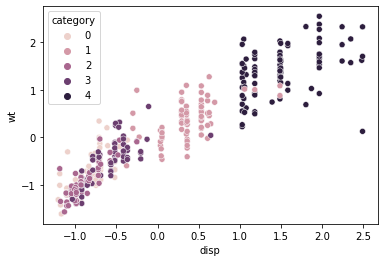

In [342]:
sns.scatterplot(data=dataset, x="disp", y="wt", hue="category")

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'hp'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[category]'>],
       [<AxesSubplot:title={'center':'origin'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[category]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[category]'>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

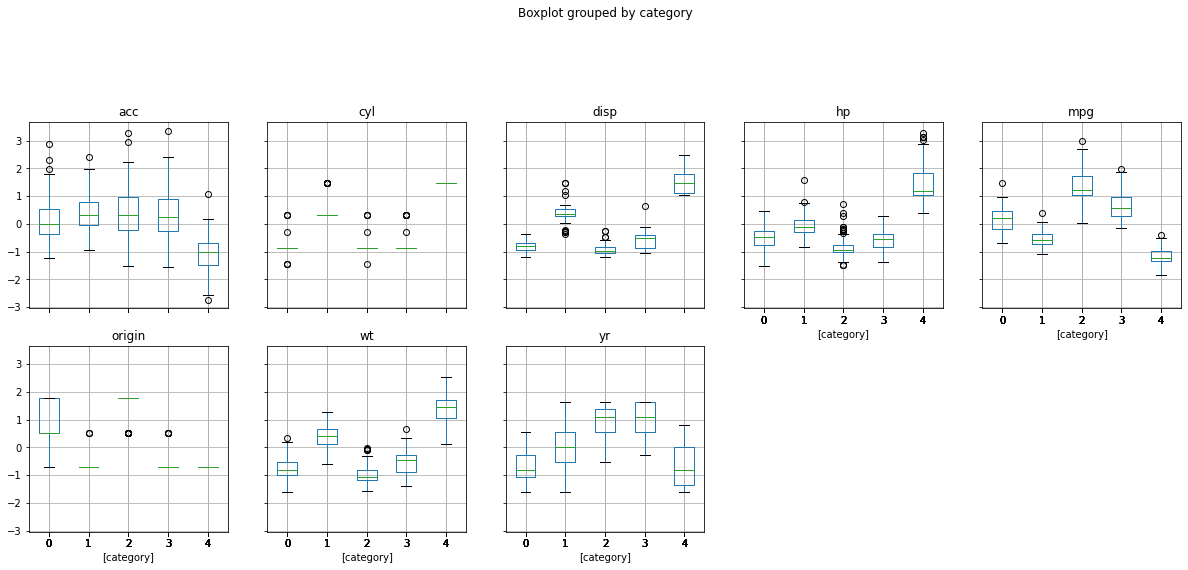

In [343]:
dataset.boxplot(by='category', layout = (5,5),figsize=(20,20))

#### 2. Predict a new datapoint

In [345]:
prediction = model.predict(test_data)

In [346]:
test_data.category = prediction

D:\official\softwares\anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [347]:
test_data

,mpg,cyl,disp,hp,wt,acc,yr,origin,category
397,0.969088,-0.864014,-0.721574,-0.584501,-0.303641,1.400433,1.63641,-0.716641,2
